In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Import the 2014 data for data munging

# Source: 
import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

enc = find_encoding("datasets/mrt_daily_ridership/2014.csv")
print("Encoding: {}".format(enc))

df_2014 = pd.read_csv("datasets/mrt_daily_ridership/2014.csv", encoding=enc)
df_2014.head()

Encoding: ascii


,month,day,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,cubao_entry,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,January,1,03:00 - 03:59,0.0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
1,January,1,04:00 - 04:59,74.0,0.0,24,0.0,20,0,38,...,3,0,0,0,0,0,0,0,0.0,0.0
2,January,1,05:00 - 05:59,525.0,88.0,191,47.0,121,20,403,...,128,104,51,114,124,333,84,121,417.0,307.0
3,January,1,06:00 - 06:59,663.0,601.0,344,310.0,187,123,619,...,376,285,185,179,489,604,334,198,935.0,822.0
4,January,1,07:00 - 07:59,831.0,965.0,358,436.0,231,178,746,...,458,418,239,200,467,847,458,274,1240.0,1477.0


## Cleaning the Data

In [83]:
## Cleaning the data

# Check the dtypes of each column

df_2014.iloc[:, 3:].dtypes

north_avenue_entry     float64
north_avenue_exit      float64
quezon_avenue_entry      int64
quezon_avenue_exit     float64
gma_kamuning_entry      object
gma_kamuning_exit       object
cubao_entry              int64
cubao_exit               int64
santolan_entry           int64
santolan_exit          float64
ortigas_entry            int64
ortigas_exit             int64
shaw_blvd_entry          int64
shaw_blvd_exit           int64
boni_avenue_entry        int64
boni_avenue_exit         int64
guadalupe_entry          int64
guadalupe_exit           int64
buendia_entry            int64
buendia_exit             int64
ayala_avenue_entry       int64
ayala_avenue_exit        int64
magallanes_entry         int64
magallanes_exit          int64
taft_entry             float64
taft_exit              float64
dtype: object

In [84]:
# Coerce objects to numeric

df_2014.iloc[:, 3:] = df_2014.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors="coerce"))
df_2014.iloc[:, 3:].dtypes

north_avenue_entry     float64
north_avenue_exit      float64
quezon_avenue_entry      int64
quezon_avenue_exit     float64
gma_kamuning_entry     float64
gma_kamuning_exit      float64
cubao_entry              int64
cubao_exit               int64
santolan_entry           int64
santolan_exit          float64
ortigas_entry            int64
ortigas_exit             int64
shaw_blvd_entry          int64
shaw_blvd_exit           int64
boni_avenue_entry        int64
boni_avenue_exit         int64
guadalupe_entry          int64
guadalupe_exit           int64
buendia_entry            int64
buendia_exit             int64
ayala_avenue_entry       int64
ayala_avenue_exit        int64
magallanes_entry         int64
magallanes_exit          int64
taft_entry             float64
taft_exit              float64
dtype: object

In [85]:
# Check for nulls

df_2014.isnull().sum()

month                   0
day                     0
time                    0
north_avenue_entry     33
north_avenue_exit       3
quezon_avenue_entry     0
quezon_avenue_exit      1
gma_kamuning_entry     10
gma_kamuning_exit      13
cubao_entry             0
cubao_exit              0
santolan_entry          0
santolan_exit           1
ortigas_entry           0
ortigas_exit            0
shaw_blvd_entry         0
shaw_blvd_exit          0
boni_avenue_entry       0
boni_avenue_exit        0
guadalupe_entry         0
guadalupe_exit          0
buendia_entry           0
buendia_exit            0
ayala_avenue_entry      0
ayala_avenue_exit       0
magallanes_entry        0
magallanes_exit         0
taft_entry             18
taft_exit              18
dtype: int64

In [86]:
# Replace nulls with zero

df_2014.fillna(0, inplace=True)
df_2014.isnull().sum()

month                  0
day                    0
time                   0
north_avenue_entry     0
north_avenue_exit      0
quezon_avenue_entry    0
quezon_avenue_exit     0
gma_kamuning_entry     0
gma_kamuning_exit      0
cubao_entry            0
cubao_exit             0
santolan_entry         0
santolan_exit          0
ortigas_entry          0
ortigas_exit           0
shaw_blvd_entry        0
shaw_blvd_exit         0
boni_avenue_entry      0
boni_avenue_exit       0
guadalupe_entry        0
guadalupe_exit         0
buendia_entry          0
buendia_exit           0
ayala_avenue_entry     0
ayala_avenue_exit      0
magallanes_entry       0
magallanes_exit        0
taft_entry             0
taft_exit              0
dtype: int64

In [87]:
# Typecast all to int

df_2014.iloc[:, 3:] = df_2014.iloc[:, 3:].applymap(int)
df_2014.iloc[:, 3:].dtypes

north_avenue_entry     int64
north_avenue_exit      int64
quezon_avenue_entry    int64
quezon_avenue_exit     int64
gma_kamuning_entry     int64
gma_kamuning_exit      int64
cubao_entry            int64
cubao_exit             int64
santolan_entry         int64
santolan_exit          int64
ortigas_entry          int64
ortigas_exit           int64
shaw_blvd_entry        int64
shaw_blvd_exit         int64
boni_avenue_entry      int64
boni_avenue_exit       int64
guadalupe_entry        int64
guadalupe_exit         int64
buendia_entry          int64
buendia_exit           int64
ayala_avenue_entry     int64
ayala_avenue_exit      int64
magallanes_entry       int64
magallanes_exit        int64
taft_entry             int64
taft_exit              int64
dtype: object

In [88]:
# Convert the month and day columns into a date

df_2014["date"] = pd.to_datetime(df_2014["month"] + df_2014["day"].map(str) + " 2014")

cols = df_2014.columns
cols = cols[2:-1].insert(0, cols[-1])

df_2014 = df_2014[cols]
df_2014.head()

,date,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,cubao_entry,cubao_exit,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,2014-01-01,03:00 - 03:59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-01,04:00 - 04:59,74,0,24,0,20,0,38,0,...,3,0,0,0,0,0,0,0,0,0
2,2014-01-01,05:00 - 05:59,525,88,191,47,121,20,403,68,...,128,104,51,114,124,333,84,121,417,307
3,2014-01-01,06:00 - 06:59,663,601,344,310,187,123,619,396,...,376,285,185,179,489,604,334,198,935,822
4,2014-01-01,07:00 - 07:59,831,965,358,436,231,178,746,582,...,458,418,239,200,467,847,458,274,1240,1477


## Sanity Check

In [90]:
# Check the time values
df_2014['time'].unique()

array(['03:00 - 03:59', '04:00 - 04:59', '05:00 - 05:59', '06:00 - 06:59',
       '07:00 - 07:59', '08:00 - 08:59', '09:00 - 09:59', '10:00 - 10:59',
       '11:00 - 11:59', '12:00 - 12:59', '13:00 - 13:59', '14:00 - 14:59',
       '15:00 - 15:59', '16:00 - 16:59', '17:00 - 17:59', '18:00 - 18:59',
       '19:00 - 19:59', '20:00 - 20:59', '21:00 - 21:59', '22:00 - 22:59',
       '23:00 - 23:59', '00:00 - 00:59', '01:00 - 01:59', '02:00 - 02:59'],
      dtype=object)

In [95]:
# Check the entries for 1 day
df_2014[df_2014['date'] == '2014-01-01']['date'].count()

24

## Daily System-wide Ridership

In [98]:
# Get only the entries columns
cols = df_2014.columns
cols = [x for x in cols if "_exit" not in x]
df_2014_entry = df_2014[cols]
df_2014_entry.head()

,date,time,north_avenue_entry,quezon_avenue_entry,gma_kamuning_entry,cubao_entry,santolan_entry,ortigas_entry,shaw_blvd_entry,boni_avenue_entry,guadalupe_entry,buendia_entry,ayala_avenue_entry,magallanes_entry,taft_entry
0,2014-01-01,03:00 - 03:59,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-01-01,04:00 - 04:59,74,24,20,38,0,0,0,0,3,0,0,0,0
2,2014-01-01,05:00 - 05:59,525,191,121,403,18,37,209,94,128,51,124,84,417
3,2014-01-01,06:00 - 06:59,663,344,187,619,30,184,457,183,376,185,489,334,935
4,2014-01-01,07:00 - 07:59,831,358,231,746,58,213,622,256,458,239,467,458,1240


In [103]:
# Add across stations
df_2014_entry["total_entry"] = df_2014_entry.iloc[:, 2:].sum(axis=1)
df_2014_entry = df_2014_entry[['date', 'time', 'total_entry']]
df_2014_entry.head()

C:\Users\FrancisZac\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,time,total_entry
0,2014-01-01,03:00 - 03:59,0
1,2014-01-01,04:00 - 04:59,636
2,2014-01-01,05:00 - 05:59,9608
3,2014-01-01,06:00 - 06:59,19944
4,2014-01-01,07:00 - 07:59,24708


In [106]:
# Add across timeslots in a day
df_2014_entry = df_2014_entry.groupby('date').agg({'total_entry': np.sum}).reset_index()
df_2014_entry.head()

,date,total_entry
0,2014-01-01,780360
1,2014-01-02,1841204
2,2014-01-03,2061848
3,2014-01-04,1555044
4,2014-01-05,1102072


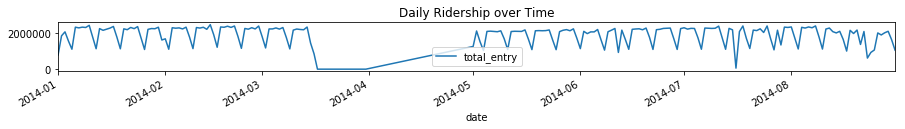

In [111]:
#plt.plot(df_2014_entry['date'], df_2014_entry['total_entry'])
#plt.xlabel('Date')
#plt.ylabel('Passengers Serviced')
#plt.show(aspect='auto')

df_2014_entry.plot('date', 'total_entry', title='Daily Ridership over Time', figsize=(15,1))

In [120]:
# Note the weird pattern between mid-March and June
# This shows a lack of datapoints during this period

df_2014_entry[(df_2014_entry['date'] > '2014-03-10') & (df_2014_entry['date'] < '2014-05-05')]

,date,total_entry
69,2014-03-11,2217472
70,2014-03-12,2192192
71,2014-03-13,2177332
72,2014-03-14,2327624
73,2014-03-15,1444976
74,2014-03-16,851104
75,2014-03-17,0
76,2014-03-18,0
77,2014-03-19,0
78,2014-03-20,0


In [121]:
# To get accurate averages and monthly data, remove March and April datapoints

df_2014_nomarch = df_2014[(df_2014['date'] < '2014-03-17') | (df_2014['date'] > '2014-04-30')]

df_2014_entry_nomarch = df_2014_entry[(df_2014_entry['date'] < '2014-03-17') | (df_2014_entry['date'] > '2014-04-30')]
df_2014_entry_nomarch[(df_2014_entry_nomarch['date'] > '2014-03-10') & (df_2014_entry_nomarch['date'] < '2014-05-05')]

,date,total_entry
69,2014-03-11,2217472
70,2014-03-12,2192192
71,2014-03-13,2177332
72,2014-03-14,2327624
73,2014-03-15,1444976
74,2014-03-16,851104
90,2014-05-01,1253760
91,2014-05-02,2109512
92,2014-05-03,1518448
93,2014-05-04,1026284


## Daily Ridership Heatmaps

In [123]:
df_2014_nomarch.head()

,date,time,north_avenue_entry,north_avenue_exit,quezon_avenue_entry,quezon_avenue_exit,gma_kamuning_entry,gma_kamuning_exit,cubao_entry,cubao_exit,...,guadalupe_entry,guadalupe_exit,buendia_entry,buendia_exit,ayala_avenue_entry,ayala_avenue_exit,magallanes_entry,magallanes_exit,taft_entry,taft_exit
0,2014-01-01,03:00 - 03:59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-01-01,04:00 - 04:59,74,0,24,0,20,0,38,0,...,3,0,0,0,0,0,0,0,0,0
2,2014-01-01,05:00 - 05:59,525,88,191,47,121,20,403,68,...,128,104,51,114,124,333,84,121,417,307
3,2014-01-01,06:00 - 06:59,663,601,344,310,187,123,619,396,...,376,285,185,179,489,604,334,198,935,822
4,2014-01-01,07:00 - 07:59,831,965,358,436,231,178,746,582,...,458,418,239,200,467,847,458,274,1240,1477


In [141]:
# Get the net passenger service (entry - exit)

df_2014_netservice = df_2014_nomarch.groupby('time').mean().reset_index()

for entry in df_2014_netservice.columns[1::2]:
    exit = entry.replace('entry', 'exit')
    df_2014_netservice[entry] = df_2014_netservice[entry] - df_2014_netservice[exit]
    
cols = [x for x in df_2014_netservice.columns if 'exit' not in x]
df_2014_netservice = df_2014_netservice[cols]

cols = [x.replace('_entry', '') for x in cols]
df_2014_netservice.columns = cols
# df_2014_netservice.head()


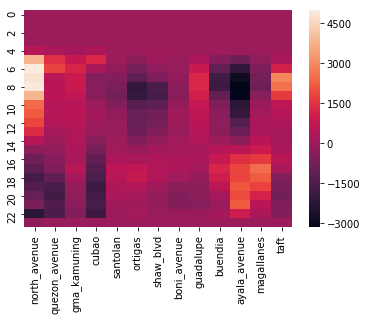

In [142]:
ax = sns.heatmap(df_2014_netservice.iloc[:, 1:])
plt.show()